<a href="https://colab.research.google.com/github/bels-03/Anemia-Types-Classification/blob/main/Anemia_Types_Classification_100_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Application of Knowledge Discovery in Database Metodology for the development of an intelligent system for accurate anemia diagnosis using classification models.**
**Let your vote in Kaggle: https://www.kaggle.com/code/anaabreullanes/anemia-types-classification-100-accuracy**

# Data Selection

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -q kaggle
!kaggle datasets download -d ehababoelnaga/anemia-types-classification

import zipfile
with zipfile.ZipFile('/content/anemia-types-classification.zip') as zip_ref:
  zip_ref.extractall('/content/anemia_data')

import pandas as pd
df = pd.read_csv('/content/anemia_data/diagnosed_cbc_data_v4.csv')
df.head(10)

Dataset URL: https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification
License(s): Apache 2.0
anemia-types-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia
5,6.6,27.3,65.4,1.8,4.3,3.96,8.8,29.7,75.2,22.2,79.6,207.0,11.5,0.18,Other microcytic anemia
6,16.7,19.1,68.2,3.2,11.4,5.15,14.2,44.8,87.1,27.5,31.6,151.0,12.8,0.14,Leukemia
7,9.3,27.4,64.0,2.6,5.9,4.39,12.0,37.9,86.4,27.3,31.6,194.0,15.9,0.19,Normocytic hypochromic anemia
8,5.2,19.7,72.4,1.0,3.8,4.85,13.2,41.0,84.7,27.2,32.1,181.0,10.0,0.15,Healthy
9,10.5,12.4,79.0,1.3,8.3,4.57,12.4,38.9,85.3,27.1,31.8,164.0,11.3,0.14,Normocytic hypochromic anemia


In [3]:
df.shape

(1281, 15)

# Preprocessing and Transformation

Chart to establish the comparison between the different diagnoses and identify which are the most common and which are less frequent.

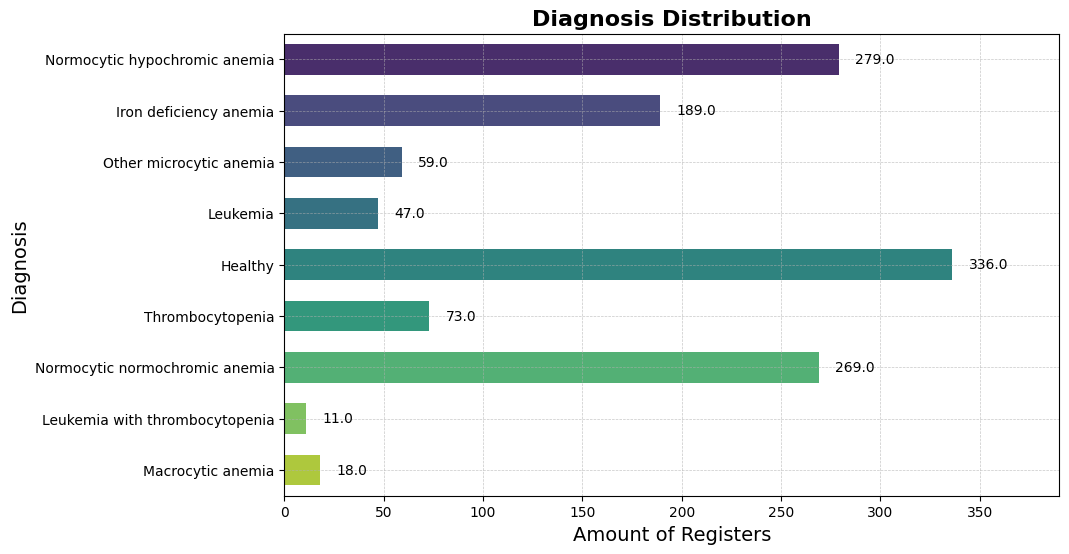

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='Diagnosis', palette='viridis', width=0.6)

ax.set_title('Diagnosis Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Amount of Registers', fontsize=14)
ax.set_ylabel('Diagnosis', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlim(0, 390)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(12, 0),
                textcoords='offset points')

plt.show()

Reviewing data to identify missing, duplicate, incorrect or anomalous values.

In [5]:
df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [6]:
df.duplicated().sum()

49

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(1232, 15)

In [8]:
data_des = df.describe(include='all')
diagnosis_des = data_des[['Diagnosis']]
data_des = data_des.drop([ 'Diagnosis'], axis = 1)
styled_df = data_des.style.format(precision=2).applymap(
    lambda x: 'background-color: rgba(255, 65, 54, 0.3)' if x < 0 else 'background-color: rgba(255, 255, 255, 1)'
)
styled_df = styled_df.data

final_df = pd.concat([styled_df, diagnosis_des], axis=1)
final_styled_df = final_df.style.format(precision=2).applymap(
    lambda x: 'background-color: rgba(255, 65, 54, 0.3)' if isinstance(x, (int, float)) and x < 0 else 'background-color: rgba(255, 255, 255, 1)'
)

final_styled_df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
count,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232
unique,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,9
top,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Healthy
freq,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,323
mean,7.85,25.90,77.59,1.88,5.13,4.71,12.19,46.27,85.73,32.25,31.74,228.93,14.34,0.26,nan
std,3.55,7.06,150.65,1.36,2.90,2.87,3.86,106.95,27.66,113.36,3.35,93.08,3.05,0.70,nan
min,0.80,6.20,0.70,0.20,0.50,1.36,-10.00,2.00,-79.30,10.90,11.50,10.00,8.40,0.01,nan
25%,6.00,25.84,70.78,1.88,5.00,4.19,10.80,39.20,81.00,25.50,30.50,157.00,13.30,0.17,nan
50%,7.40,25.84,77.51,1.88,5.14,4.60,12.20,46.15,86.55,27.70,32.00,211.00,14.31,0.26,nan
75%,8.70,25.84,77.51,1.88,5.14,5.10,13.50,46.15,90.20,29.60,32.90,290.00,14.80,0.26,nan


The HGB (Hemoglobin) and MCV (Mean Corpuscular Volume) columns have negative minimum values, values ​​that would be physically impossible and would have no clinical significance because:

Hemoglobin is a protein present in red blood cells that carries oxygen in the blood, and its levels are measured in grams per deciliter (g/dL).

Mean corpuscular volume is a parameter that measures the average size of red blood cells.

In [9]:
import plotly.graph_objs as go

trace = go.Scatter(
    x=df.index,
    y=df['HGB'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['HGB'].apply(lambda x: 'rgba(44, 160, 101, 0.8)' if x >= 0 else 'rgba(255, 0, 0, 0.8)')
    ),
    name='HGB'
)

trace_zero_line = go.Scatter(
    x=df.index,
    y=[0] * len(df),
    mode='lines',
    line=dict(color='rgba(0, 0, 0, 0.8)', width=2, dash='dash'),
    showlegend=False
)

layout = go.Layout(
    title='Scatter plot of the Hemoglobin variable',
    title_font=dict(size=24, color='rgba(0, 0, 0, 0.8)'),
    xaxis=dict(
        title='Register',
        title_font=dict(size=18, color='rgba(0, 0, 0, 0.8)'),
        tickmode='linear',
        tick0=0,
        dtick=300,
        showgrid=True,
        gridcolor='lightgrey',
        gridwidth=0.5,
        griddash='dash'
    ),
    yaxis=dict(
        title='Hemoglobin (g/dL)',
        title_font=dict(size=18, color='rgba(0, 0, 0, 0.8)'),
        showgrid=True,
        gridcolor='lightgrey',
        gridwidth=0.5,
        griddash='dash'
    ),
    plot_bgcolor='rgba(255,255,255,1)',
    paper_bgcolor='rgba(255,255,255,1)',
    font=dict(size=16, color='rgba(0, 0, 0, 0.8)'),
    width=800,
    height=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

fig = go.Figure(data=[trace, trace_zero_line], layout=layout)

fig.show()


In [10]:

trace = go.Scatter(
    x=df.index,
    y=df['MCV'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['MCV'].apply(lambda x: 'rgba(44, 160, 101, 0.8)' if x >= 0 else 'rgba(255, 0, 0, 0.8)')
    ),
    name='MCV'
)


trace_zero_line = go.Scatter(
    x=df.index,
    y=[0] * len(df),
    mode='lines',
    line=dict(color='rgba(0, 0, 0, 0.8)', width=2, dash='dash'),
    showlegend=False
)

layout = go.Layout(
    title='Scatter plot of the Mean Corpuscular Volume variable',
    title_font=dict(size=24, color='rgba(0, 0, 0, 0.8)'),
    xaxis=dict(
        title='Register',
        title_font=dict(size=18, color='rgba(0, 0, 0, 0.8)'),
        tickmode='linear',
        tick0=0,
        dtick=300,
        showgrid=True,
        gridcolor='lightgrey',
        gridwidth=0.5,
        griddash='dash'
    ),
    yaxis=dict(
        title='Mean Corpuscular Volume (fL)',
        title_font=dict(size=18, color='rgba(0, 0, 0, 0.8)'),
        showgrid=True,
        gridcolor='lightgrey',
        gridwidth=0.5,
        griddash='dash'
    ),
    plot_bgcolor='rgba(255,255,255,1)',
    paper_bgcolor='rgba(255,255,255,1)',
    font=dict(size=16, color='rgba(0, 0, 0, 0.8)'),
    width=800,
    height=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

fig = go.Figure(data=[trace, trace_zero_line], layout=layout)

fig.show()


This negative values were eliminated from the dataset

In [11]:
df = df.drop(df[df['HGB'] < 0].index[0])
df = df.drop(df[df['MCV'] < 0].index[0])

For subsequent analyzes it is important to have the dataset made up entirely of numerical variables.

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Diagnosis_encoded']  = label_encoder.fit_transform(df['Diagnosis'])

df = df.drop('Diagnosis', axis = 1)
df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis_encoded
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,5
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,5
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,1
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,1
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,0
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,0
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,0
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,0


In the data set, it was imperative to analyze the outliers due to the possible repercussions they could have on the results of statistical analysis.

In [13]:
import numpy as np

columns_to_plot = df.columns
traces = []

for column in columns_to_plot:
    trace = go.Box(
        y=df[column],
        name=column,
        marker=dict(color=np.random.choice(['rgba(93, 164, 214, 0.8)', 'rgba(255, 144, 14, 0.8)', 'rgba(44, 160, 101, 0.8)', 'rgba(255, 65, 54, 0.8)']))
    )
    traces.append(trace)

layout = go.Layout(
    title='Box and whisker plot of the dataset',
    title_font=dict(size=22, color='rgba(0, 0, 0, 0.8)'),
    xaxis=dict(
        title='Hematological variables',
        title_font=dict(size=20, color='rgba(0, 0, 0, 0.8)'),
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title='Scores',
        title_font=dict(size=20, color='rgba(0, 0, 0, 0.8)'),
        tickfont=dict(size=14)
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(size=14, color='rgba(0, 0, 0, 0.8)'),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.3,
        xanchor='center',
        x=0.5,
        font=dict(size=14)
    )
)
fig = go.Figure(data=traces, layout=layout)

fig.show()

In [14]:
df.shape

(1230, 15)

The z-score allows to identify and treat observations that could bias or distort the results of the analysis. It was decided to work in a differentiated way with all the data and then purify it (eliminate the outliers)

In [15]:
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)

# Extreme values ​​tend to have z-scores outside the range of 3 standard deviations
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_data = df[filtered_entries]
filtered_data # Dataset without outliers

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis_encoded
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,5
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,1
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,1
6,16.70,19.100,68.200,3.20000,11.40000,5.15,14.2,44.8000,87.1,27.5,31.6,151.0,12.800000,0.14000,2
7,9.30,27.400,64.000,2.60000,5.90000,4.39,12.0,37.9000,86.4,27.3,31.6,194.0,15.900000,0.19000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,0
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,0
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,0
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,0


In [16]:
columns_to_plot = filtered_data.columns
traces = []

for column in columns_to_plot:
    trace = go.Box(
        y=filtered_data[column],
        name=column,
        marker=dict(color=np.random.choice(['rgba(93, 164, 214, 0.8)', 'rgba(255, 144, 14, 0.8)', 'rgba(44, 160, 101, 0.8)', 'rgba(255, 65, 54, 0.8)']))
    )
    traces.append(trace)

layout = go.Layout(
    title='Box and whisker plot of filtered dataset',
    title_font=dict(size=22, color='rgba(0, 0, 0, 0.8)'),
    xaxis=dict(
        title='Hematological variables',
        title_font=dict(size=20, color='rgba(0, 0, 0, 0.8)'),
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title='Scores',
        title_font=dict(size=20, color='rgba(0, 0, 0, 0.8)'),
        tickfont=dict(size=14)
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(size=14, color='rgba(0, 0, 0, 0.8)'),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.3,
        xanchor='center',
        x=0.5,
        font=dict(size=14)
    )
)

# Crear la figura
fig = go.Figure(data=traces, layout=layout)

# Mostrar el gráfico en el notebook (opcional, si estás usando un Jupyter Notebook)
fig.show()


# Data Mining


For the diagnosis, three different machine learning models were evaluated:

Decision Tree (DecisionTreeClassifier)

K-Near Neighbor (KNeighborsClassifier)

XGBoost (xgb).

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In the first instance, these models were trained and evaluated without performing any type of outlier elimination in the data (df).

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Diagnosis_encoded'], axis=1), df['Diagnosis_encoded'], test_size=0.2, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score

decision_tree_1 = DecisionTreeClassifier()
xgboost_1 = xgb.XGBClassifier()
knn_1 = KNeighborsClassifier()

models_1 = [decision_tree_1, xgboost_1, knn_1]
accuracy_scores_1 = []
y_pred_1 = []

for model in models_1:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_1.append(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_1.append(accuracy)
    print(f"{model.__class__.__name__}: {accuracy}")



DecisionTreeClassifier: 0.9959349593495935
XGBClassifier: 0.9796747967479674
KNeighborsClassifier: 0.6422764227642277


Subsequently, we worked with the data set without outliers (filtered_data) and the same three models were retrained and evaluated, with the aim of analyzing the impact that the presence of outliers has on the performance of these classifiers.


In [20]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(filtered_data.drop(['Diagnosis_encoded'], axis=1), filtered_data['Diagnosis_encoded'], test_size=0.2, random_state=42)

In [21]:
decision_tree_2 = DecisionTreeClassifier()
xgboost_2 = xgb.XGBClassifier()
knn_2 = KNeighborsClassifier()

models_2 = [decision_tree_2, xgboost_2, knn_2]
accuracy_scores_2 = []
y_pred_2 = []

for model in [decision_tree_2, xgboost_2, knn_2]:
    model.fit(x_train2, y_train2)
    y_pred = model.predict(x_test2)
    y_pred_2.append(y_pred)
    accuracy = accuracy_score(y_test2, y_pred)
    accuracy_scores_2.append(accuracy)
    print(f"{model.__class__.__name__}: {accuracy}")

DecisionTreeClassifier: 1.0
XGBClassifier: 0.9870689655172413
KNeighborsClassifier: 0.728448275862069


#Interpretation / Evaluation

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score

The metrics of accuracy, F1 score, sensitivity and specificity were used to evaluate the performance of the models. Accuracy indicates the overall percentage of correct predictions, F1 score combines accuracy and sensitivity to provide a balanced measure, sensitivity reflects the ability to correctly identify classes, specificity shows the ability to detect negative cases, and precision details the prediction performance of each class. These metrics together provide a comprehensive evaluation of the model, facilitating the selection of the most appropriate model for the problem at hand.

In [23]:
all_accuracy_scores = []
models_names = []
all_models = []
all_f1_scores = []
all_precision_scores = []
all_recall_scores = []
all_cross_val_scores = []

for i, model in enumerate(models_1):
  models_names.append(f"{model.__class__.__name__} 1")
  all_models.append(model)
  all_accuracy_scores.append(accuracy_scores_1[i])
  all_f1_scores.append(f1_score(y_test, y_pred_1[i], average='weighted'))
  all_recall_scores.append(recall_score(y_test, y_pred_1[i], average='weighted'))
  all_precision_scores.append(precision_score(y_test, y_pred_1[i], average='weighted'))

  models_names.append(f"{model.__class__.__name__} 2")
  all_models.append(models_2[i])
  all_accuracy_scores.append(accuracy_scores_2[i])
  all_f1_scores.append(f1_score(y_test2, y_pred_2[i], average='weighted'))
  all_recall_scores.append(recall_score(y_test2, y_pred_2[i], average='weighted'))
  all_precision_scores.append(precision_score(y_test2, y_pred_2[i], average='weighted'))

for model in all_models:
  score = cross_val_score(model, df.drop(['Diagnosis_encoded'], axis=1), df['Diagnosis_encoded'], cv=10)
  all_cross_val_scores.append(score.mean())

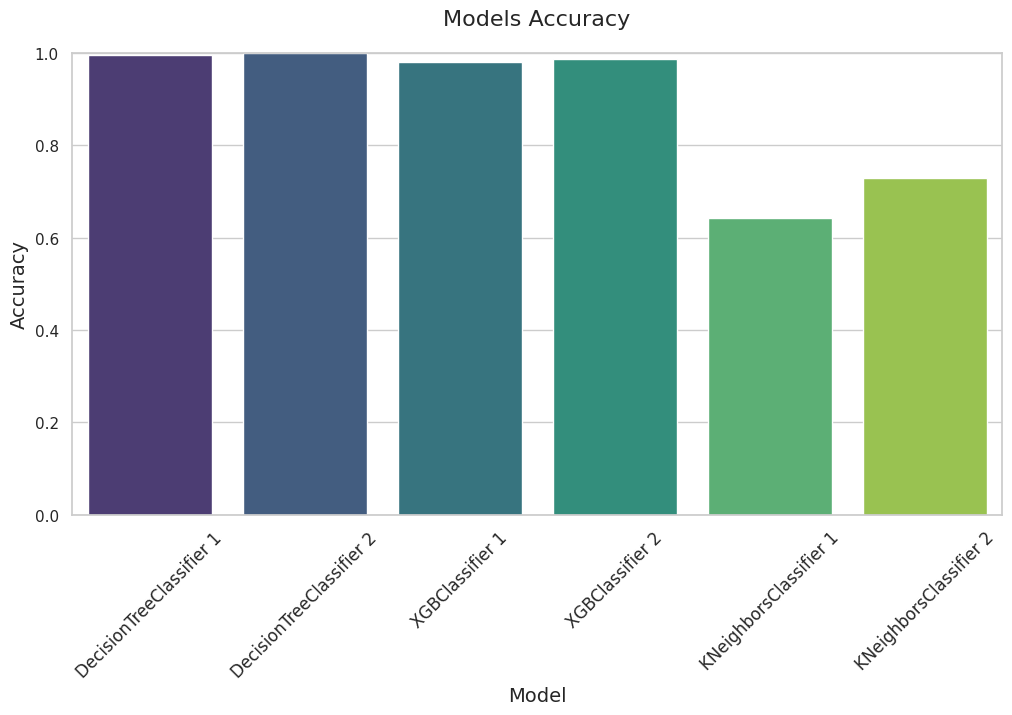

In [24]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=models_names, y=all_accuracy_scores, ax=ax, palette="viridis", saturation=0.7, ci=None, errwidth=0.5)

ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Models Accuracy', fontsize=16, pad=20)

plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1)
plt.show()

In [25]:
!pip install kaleido


data = {
    'Model': models_names,
    'Accuracy': all_accuracy_scores,
    'Cross-Validation': all_cross_val_scores,
    'F1 Score': all_f1_scores,
    'Precision': all_precision_scores,
    'Recall': all_recall_scores
}

stats = pd.DataFrame(data)

df_long = pd.melt(stats, id_vars=['Model'], var_name='Metric', value_name='Score')

layout = go.Layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure(layout=layout)

for metric, color in zip(df_long['Metric'].unique(), ['blue', 'orange', 'green', 'red', 'purple']):
    df_metric = df_long[df_long['Metric'] == metric]
    fig.add_trace(go.Bar(
        x=df_metric['Model'],
        y=df_metric['Score'],
        name=metric,
        marker_color=color,
        text=df_metric['Score'].apply(lambda x: f'{x:.2}'),
        textposition='inside',
        textangle=-90
    ))

fig.update_layout(
    title='Models Performance Metrics',
    xaxis=dict(title='Models', tickangle=45, tickfont=dict(size=16)),
    yaxis=dict(title='Scores',tickfont=dict(size=16), range=[0, 1]),
    legend=dict(x=1.02, y=0.5, font=dict(size=14)),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    width=1200,
    height=600
)

fig.show()